In [46]:
import numpy as np
import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import spacy
from spacy.lang.es import Spanish
from sklearn.decomposition import LatentDirichletAllocation

**Carga de datos**

In [2]:
raw_cvs_SoftwareDev = open('../raw_data/Data_CV_SoftwareDeveloper.txt',encoding='utf-8').read()
raw_cvs_NetworkEng = open('../raw_data/Data_CV_NetworkEngineer.txt',encoding='utf-8').read()
raw_cvs_IADev= open('../raw_data/Data_CV_IADeveloper.txt',encoding='utf-8').read()

In [5]:
raw_cvs_SoftwareDev

'CV 1: Desarrollador Full-Stack Experimentado\nNombre: Juan Pérez\n\nResumen Profesional: Desarrollador Full-Stack con más de 8 años de experiencia en el diseño, desarrollo y despliegue de aplicaciones web y móviles. Expertise en tecnologías como JavaScript (Node.js, React.js, Angular), HTML5, CSS3 y bases de datos SQL y NoSQL. Amplia experiencia en trabajo en equipo y liderazgo técnico.\n\nExperiencia Laboral:\n\nSenior Full-Stack Developer, Tech Solutions Inc.\nLideré el desarrollo de una plataforma de gestión de proyectos utilizando Node.js y React.js, reduciendo los tiempos de entrega en un 30%.\nDesarrollador Front-End, WebTech Co.\nContribuí al diseño y desarrollo de una aplicación web de e-commerce utilizando Angular y MongoDB.\nEducación:\n\nIngeniería Informática, Universidad Nacional de Ingeniería (UNI)\nAptitudes:\n\nDesarrollo Full-Stack\nLiderazgo Técnico\nResolución de Problemas\n\n\nCV 2: Desarrollador Móvil Junior\nNombre: Ana García\n\nResumen Profesional: Desarrollado

In [8]:
raw_cvs_NetworkEng

'CV 1: Enfoque en la experiencia en Cisco\n\nNombre: Juan Pérez\n\nResumen: Ingeniero de Redes con más de 5 años de experiencia en diseño, implementación y mantenimiento de redes Cisco. Especializado en enrutamiento y conmutación, seguridad de red y administración de dispositivos Cisco.\n\nExperiencia Laboral:\n\nIngeniero de Redes en ABC Solutions (2018 - Presente)\nLideró el diseño e implementación de una red empresarial basada en Cisco para una empresa de manufactura.\nRealizó la configuración de dispositivos Cisco ISR, switches Catalyst y firewalls ASA.\nTécnico de Redes en XYZ Networking (2015 - 2018)\nProporcionó soporte técnico y mantenimiento preventivo a la infraestructura de red de clientes, incluida la resolución de problemas y actualizaciones de firmware.\nEducación:\n\nLicenciatura en Ingeniería de Telecomunicaciones, Universidad Nacional (2014)\nCertificaciones:\n\nCisco Certified Network Professional (CCNP)\nCisco Certified Network Associate (CCNA)\nCisco Certified Desig

In [9]:
raw_cvs_IADev

'CV 1: Ingeniero de Datos Experimentado\n\nNombre: Ana García\n\nResumen Profesional: Ingeniera de Datos con más de 6 años de experiencia en la gestión, procesamiento y análisis de grandes volúmenes de datos. Especializada en el diseño e implementación de pipelines de datos utilizando herramientas como Apache Spark, Hadoop y Kafka. Amplios conocimientos en lenguajes de programación como Python, R y Scala, así como en bases de datos SQL y NoSQL. Capacidad para trabajar en equipo y comunicar resultados técnicos de manera efectiva.\n\nExperiencia Laboral:\n\nIngeniero de Datos Senior, DataTech Solutions\nLideré la implementación de pipelines de datos en tiempo real utilizando Apache Kafka, mejorando la eficiencia del procesamiento de datos en un 40%.\nAnalista de Datos, Analytic Corp.\nDesarrollé modelos de machine learning para la predicción de demanda utilizando Python y TensorFlow, lo que resultó en una mejora del 25% en la precisión de las predicciones.\nEducación:\n\nIngeniería en Si

**Tokenizamos**

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenize_words(text):
    # Separamos en palabras eliminando caracteres especiales
    words_split = re.split(r'\W+', text)
    # Convertimos palabras a minúscula
    words_split = [word.lower() for word in words_split]
    # Eliminar caracteres alfanumericos
    words_split = [word for word in words_split if word.isalpha()]
    # Eliminamos las stopwords del español (las palabras en ingles no hacemos nada)
    words_split = [word for word in words_split if not word in stop_words]

    return words_split
    

In [5]:
cvs_SoftwareDev_clean = tokenize_words(raw_cvs_SoftwareDev)
cvs_NetworkEng_clean = tokenize_words(raw_cvs_NetworkEng)
cvs_IADev_clean = tokenize_words(raw_cvs_IADev)

**Conteo de palabras**

In [6]:
def count_freq_tokens(cvs_tokens_clean):
    vectorizer = TfidfVectorizer()
    vectorizer.fit_transform(cvs_tokens_clean).toarray()
    return vectorizer

In [7]:
vectorizer_SoftwareDev = count_freq_tokens(cvs_SoftwareDev_clean)
vectorizer_NetworkEng = count_freq_tokens(cvs_NetworkEng_clean)
vectorizer_IADev = count_freq_tokens(cvs_IADev_clean)

In [8]:
# Ordenamos los diccionarios en orden descendente
def sorted_dict(vectorizer):
    keys = list(vectorizer.vocabulary_.keys())
    values = list(vectorizer.vocabulary_.values())

    merged = list(zip(keys, values))
    sorted_list = sorted(merged, key=lambda x: x[1], reverse=True)

    # Eliminar tokens con menos de 5 frecuencia por palabra
    #sorted_list = [word for word in sorted_list if word[1] > 5]
    return sorted_list

In [9]:
sorted_SoftwareDev = sorted_dict(vectorizer_SoftwareDev)
sorted_NetworkEng = sorted_dict(vectorizer_NetworkEng)
sorted_IADev = sorted_dict(vectorizer_IADev)

In [13]:
print('Longitud de token en CVs Software Developer:',len(sorted_SoftwareDev))
print('Longitud de token en CVs Network Developer:',len(sorted_NetworkEng))
print('Longitud de token en CVs IA Developer:',len(sorted_IADev))

Longitud de token en CVs Software Developer: 240
Longitud de token en CVs Network Developer: 184
Longitud de token en CVs IA Developer: 284


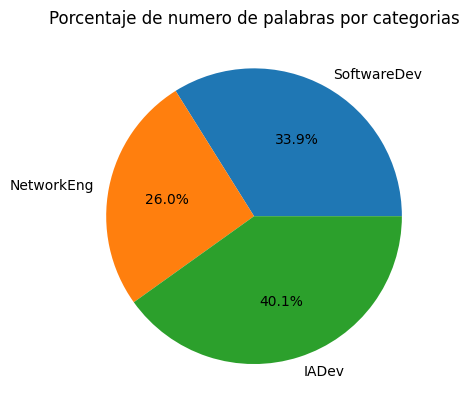

In [20]:
# Graficar porcentaje de tokens por categoria de CVs
plt.pie([len(sorted_SoftwareDev),len(sorted_NetworkEng),len(sorted_IADev)], 
        labels=['SoftwareDev','NetworkEng','IADev'], autopct='%1.1f%%')
plt.title('Porcentaje de numero de palabras por categorias')
plt.show()

Podemos observar como tenemos una mayor concentración de palabras en la categoria IADev, seguido de SoftwareDev. 

Esto hace ver como nuestro corpus se inclinará mas hacia palabras tipicas de las categorias con mas cantidad de tokens.

**Graficar frecuencias**

In [32]:
def plot_lines_cvs(cvs, num_terms):
    # Extraccion de terminos y frecuencias
    terms = [item[0] for item in cvs]
    freq = [item[1] for item in cvs]

    # Extraemos n numeros de terminos
    terms = terms[:num_terms]
    freq = freq[:num_terms]

    # Pintar grafico
    plt.figure(figsize=(20, 10))
    plt.plot(terms, freq, marker='o', linestyle='-')
    plt.title('Frecuencia de términos')
    plt.xlabel('Términos')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=80)
    plt.grid(True)
    plt.show()

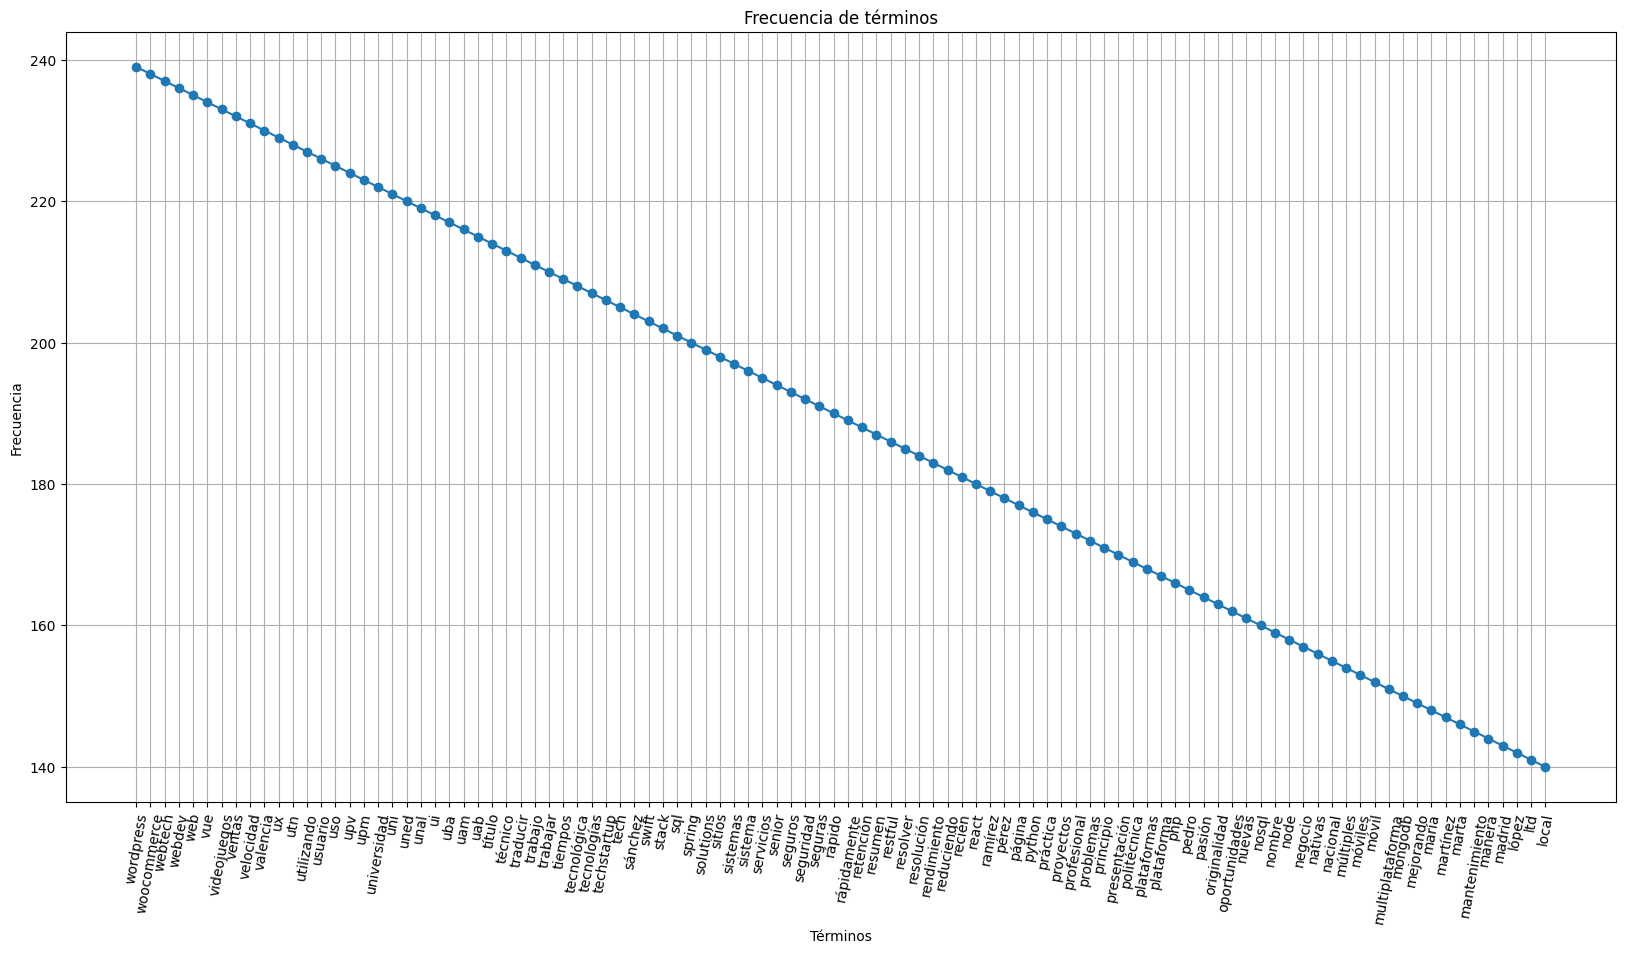

In [34]:
plot_lines_cvs(sorted_SoftwareDev, num_terms=100)

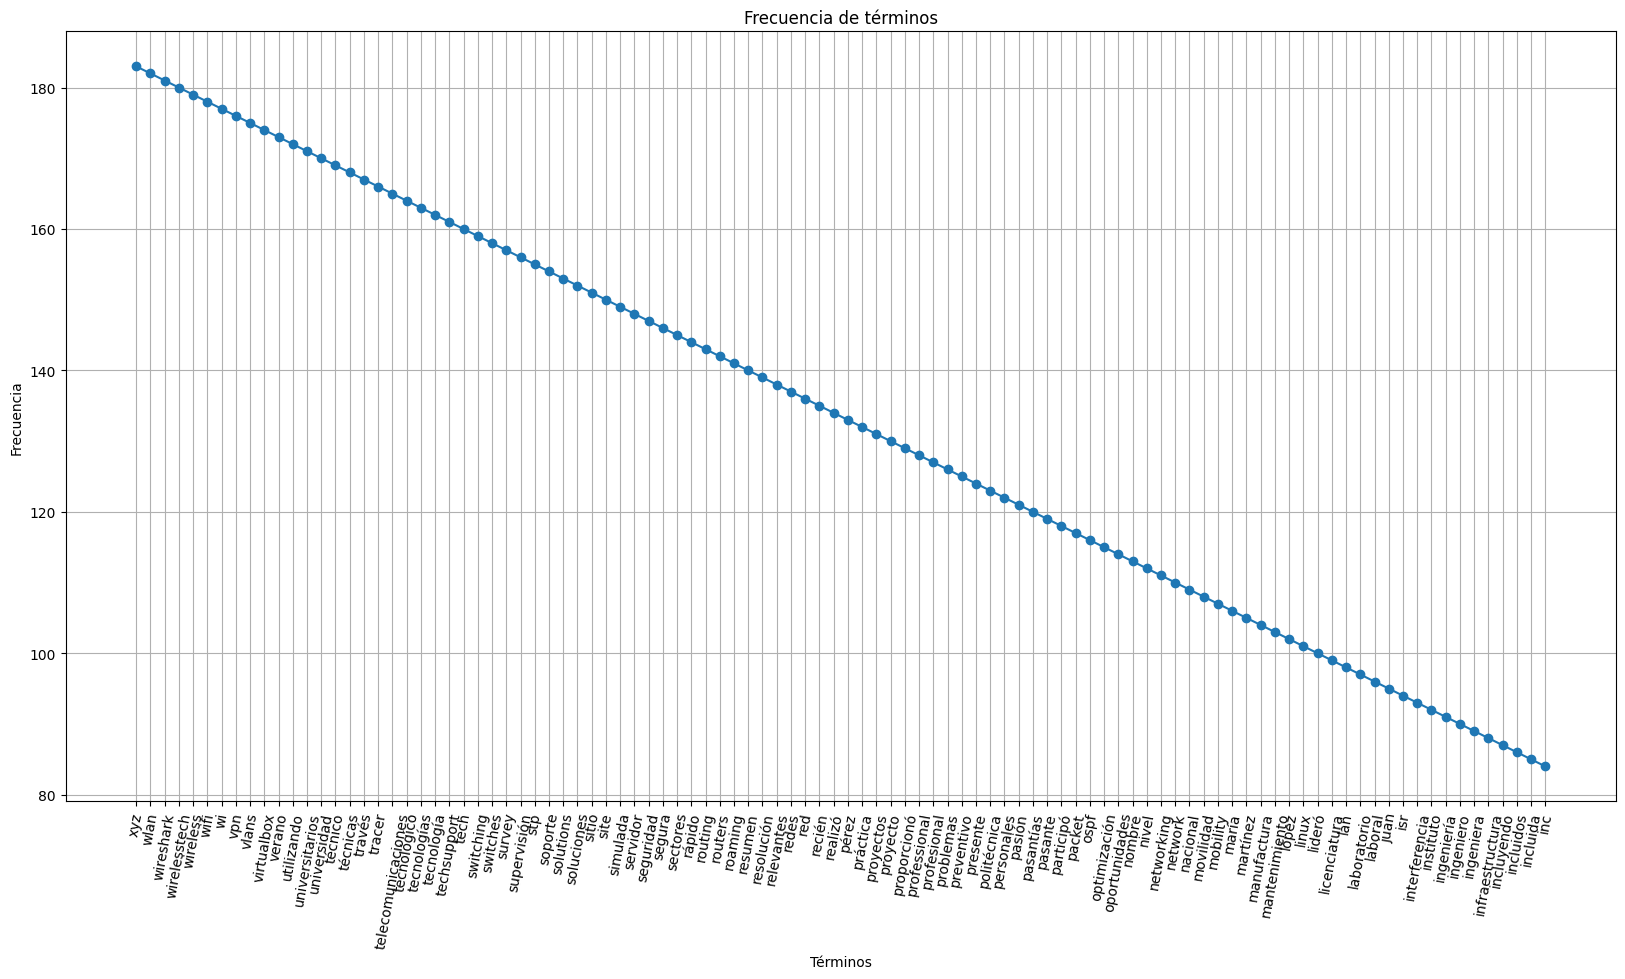

In [16]:
plot_lines_cvs(sorted_NetworkEng, num_terms=100)

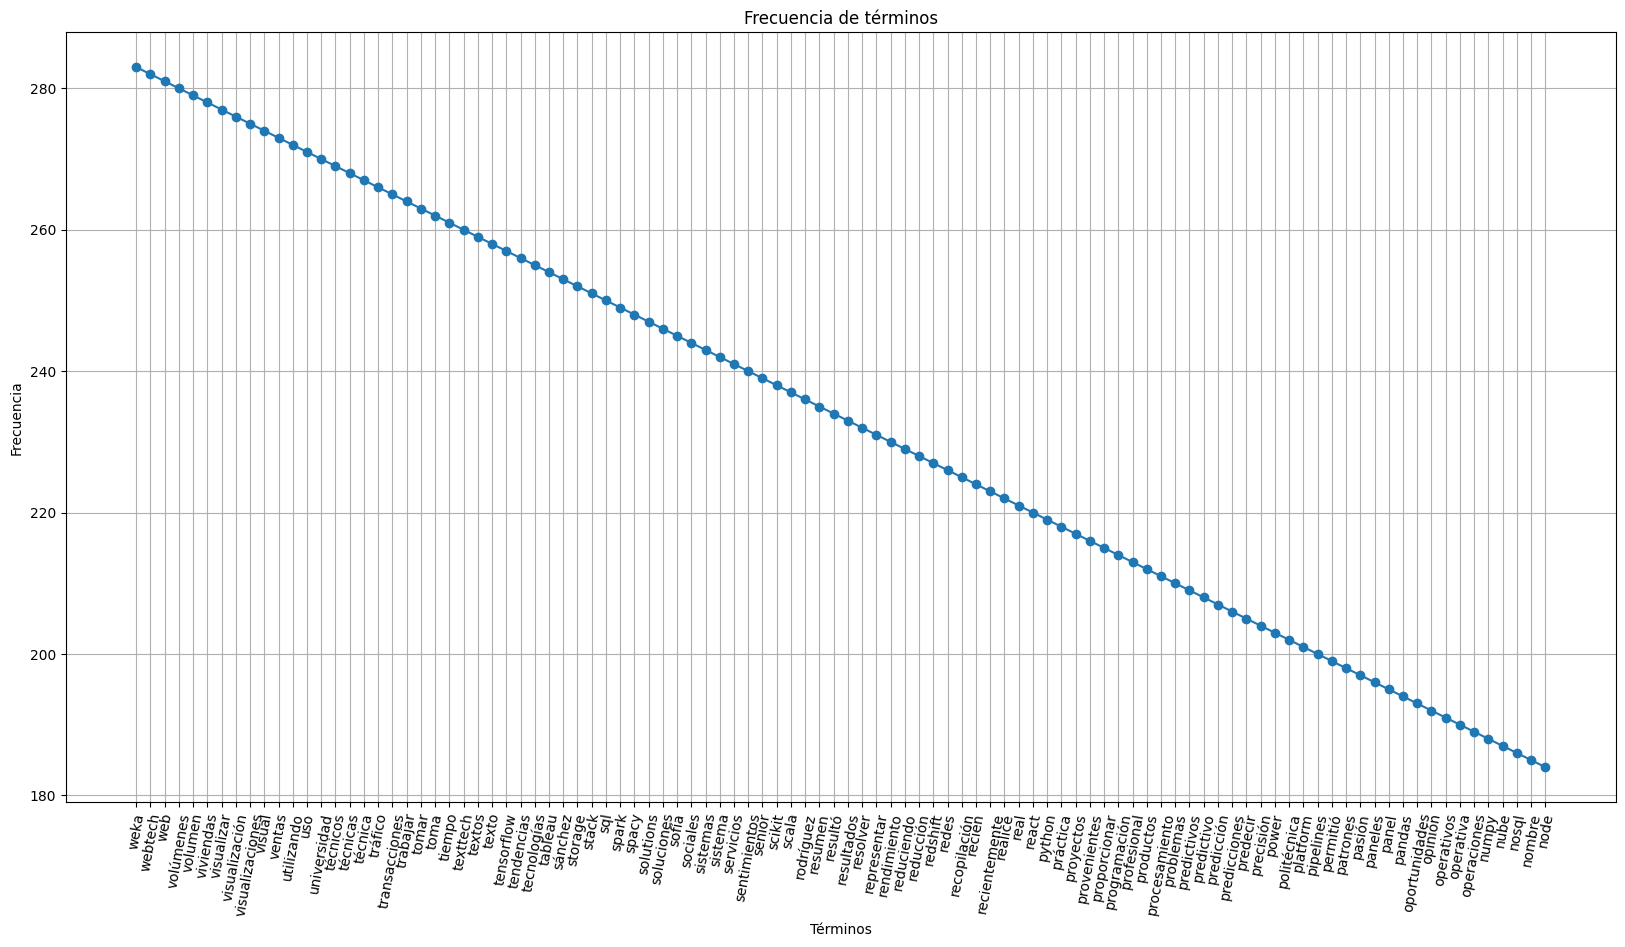

In [17]:
plot_lines_cvs(sorted_IADev, num_terms=100)

Podemos observar como en general los tres tipos de CV (Software, IA y Network) difieren en las tecnologias usadas.
Asi como, entornos de usuario y dispositivos.

Otras palabras, sobretodo enfocadas mas en las softkill, tienden a repetirse. Los nombres propios y sitios tambien son somunes entre estos tipos de CV.

**Modelado de Temas: Entendiendo los topicos discutidos en cada tipo de CV**

In [28]:
# lematizacion de tokens
nlp = spacy.load("es_core_news_sm")

# Cargamos el lemmatizer en español
def lemmatize_words(list_words):
    lemmatized_tokens = []
    # Recorremos la lista, convertimos a nlp y estraemos la posicion del texto con el lemma_ asociado
    for word in list_words:
        doc = nlp(word[0])
        for token in doc:
            lemmatized_tokens.append(token.lemma_)
    return lemmatized_tokens

In [36]:
lemma_SoftwareDev=lemmatize_words(sorted_SoftwareDev)
lemma_NetworkEng=lemmatize_words(sorted_NetworkEng)
lemma_IADev=lemmatize_words(sorted_IADev)

In [44]:
# Bags of Words, para matriz de datos
def BoW(data):
    c_vect = TfidfVectorizer(max_features=10000)
    text = c_vect.fit_transform(data)
    terms = c_vect.get_feature_names_out()
    return terms, text

In [68]:
terms_Soft, text_Soft =BoW(lemma_SoftwareDev)
terms_Net, text_Net =BoW(lemma_NetworkEng)
terms_IA, text_IA =BoW(lemma_IADev)

In [110]:
# Calculo LDA, ajustamos parametros con terminos y textos dados arriba (segun categoria deseada)
def LDA(terms, text):
    n_topics = 5
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=10, learning_method='online',
                                    learning_offset=50, random_state=0, n_jobs=-1)

    document_topic = lda.fit_transform(text)
    topic_term = lda.components_
    return topic_term, terms

In [75]:
# Estudio del modelo
def topic_relevant_words(model, terms, topic_id, num_words):
    print('Grupo:',topic_id)
    print('----------------------------')
    # Estrae las posiciones de los mayores scores
    top_term_ids = model[topic_id,:].argsort()[:-num_words-1:-1]
    # Extrae los terminos de las posiciones correspondientes
    top_terms = [terms[id_term] for id_term in top_term_ids]
    # Extrae y calcula las probabilidades
    top_probabilities = model[topic_id, top_term_ids] / np.sum(model[topic_id,:])
    #Imprime el resultado
    for term, probabilities in zip(top_terms, top_probabilities):
        print("{:s}:      \t{:.4f}".format(term, probabilities))
    print('-----------------------------------\n')

In [115]:
topic_term, terms=LDA(terms_IA, text_IA)
topic_relevant_words(topic_term, terms, 4, 10)

Grupo: 4
----------------------------
aumento:      	0.0248
amazon:      	0.0247
aws:      	0.0247
especializado:      	0.0120
sistema:      	0.0116
panel:      	0.0116
basado:      	0.0103
conjunto:      	0.0084
identificar:      	0.0077
co:      	0.0076
-----------------------------------



*Observaciones de los topicos (divididos en 5 temas)*
1. SoftwareDev:
    - Grupo 1. Este grupo parece estar relacionado con el diseño y la plataforma de desarrollo. Los términos como "diseño", "plataforma", "django", "aprender" y "adquirir" sugieren un enfoque en la adquisición de habilidades y conocimientos en el diseño y desarrollo de plataformas.
    - Grupo 2.  Este grupo parece centrarse en la creatividad y el desarrollo web. Términos como "creativo", "creatividad", "cms", "desarrolladorar" sugieren un enfoque en el desarrollo web creativo y el uso de sistemas de gestión de contenido (CMS).
    - Grupo 3. Este grupo parece relacionarse con el equipo y el desarrollo móvil. Términos como "equipo", "móvil", "desarrollo", "andré", "aprendizaje" sugieren un enfoque en el desarrollo móvil y la colaboración en equipo.
    - Grupo 4. Este grupo parece estar relacionado con la capacidad técnica y el trabajo en equipo. Términos como "trabajar", "enfocar", "capacidad", "angular", "frameworks" sugieren un enfoque en habilidades técnicas y la capacidad para trabajar en equipo en proyectos de desarrollo.
    - Grupo 5. Este grupo parece estar relacionado con la experiencia y el desarrollo de aplicaciones. Términos como "experiencia", "destacado", "conversión", "appdev", "developer" sugieren un enfoque en la experiencia del usuario y el desarrollo de aplicaciones.

2. NetworkEng:
    - Grupo 1. Este grupo parece estar relacionado con temas de administración y configuración de redes. Términos como "administración", "asa", "dns", "eigrp" sugieren un enfoque en la gestión y configuración de redes informáticas.
    - Grupo 2. Este grupo parece centrarse en temas relacionados con el diseño y la configuración de redes domésticas y empresariales. Términos como "doméstico", "congestión", "red", "ospf", "configuración" sugieren un enfoque en la configuración y optimización de redes.
    - Grupo 3. Este grupo parece estar relacionado con temas de controlador y conectividad inalámbrica. Términos como "controlador", "conectividad", "inalámbrico", "proyecto" sugieren un enfoque en la configuración y gestión de redes inalámbricas y proyectos relacionados.
    - Grupo 4. Este grupo parece estar relacionado con temas de educación y certificación en tecnologías de redes. Términos como "educación", "aprendizaje", "certificación", "ccda", "autenticación" sugieren un enfoque en la formación y certificación en tecnologías de redes.
    - Grupo 5. Este grupo parece centrarse en temas de ampliación de conocimientos y certificaciones en tecnologías de redes. Términos como "conocimiento", "certificación", "ccna", "catalyst", "controller" sugieren un enfoque en la expansión de habilidades y certificaciones en tecnologías de redes.

3. IADev:
    - Grupo 1. Este grupo parece estar relacionado con temas de análisis de datos y aplicaciones prácticas en entornos como el procesamiento de datos y la analítica. Términos como "airflow", "accidente", "analytics", "algoritmos" sugieren un enfoque en la aplicación de algoritmos analíticos en diferentes contextos, posiblemente incluyendo el análisis de texto.
    - Grupo 2. Este grupo parece centrarse en temas de aprendizaje automático y desarrollo de habilidades relacionadas. Términos como "aprendizaje", "analista", "aplicación", "automático" sugieren un enfoque en el desarrollo de habilidades en aprendizaje automático y análisis de datos.
    - Grupo 3. Este grupo parece estar relacionado con temas de análisis de datos avanzados y modelado predictivo. Términos como "amplio", "analítica", "fraude", "predicción", "modelo" sugieren un enfoque en el análisis avanzado de datos y la predicción de eventos futuros.
    - Grupo 4. Este grupo parece centrarse en temas de almacenamiento de datos y tecnologías asociadas como Apache y Hadoop. Términos como "apache", "almacenamiento", "hadoop", "ciencia" sugieren un enfoque en el almacenamiento y procesamiento de grandes volúmenes de datos, posiblemente en entornos de ciencia de datos.
    - Grupo 5. Este grupo parece estar relacionado con temas de computación en la nube y servicios como AWS (Amazon Web Services). Términos como "aumento", "amazon", "aws", "sistema" sugieren un enfoque en el despliegue y la gestión de aplicaciones en la nube, posiblemente con un enfoque en servicios específicos de AWS.